### Description:

Humans have greatly associated themselves with Songs & Music. It can improve mood, decrease pain and anxiety, and facilitate opportunities for emotional expression. Research suggests that music can benefit our physical and mental health in numerous ways.

Lately, multiple studies have been carried out to understand songs & it's popularity based on certain factors. Such song samples are broken down & their parameters are recorded to tabulate. Predicting the Song Popularity is the main aim.

The project is simple yet challenging, to predict the song popularity based on energy, acoustics, instumentalness, liveness, dancibility, etc. The dataset is large & it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

### Acknowledgement:
The dataset is referred from Kaggle.


### Objective:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the song popularity.

# <center> Overview:
**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis
3. Data Pre-processing
4. Data Manipulation
5. Predictive Modelling

# Download the Data

In [1]:
import numpy as np
import pandas as pd
INPUT_FILE = "song_data.csv"
raw_data = pd.read_csv('song_data.csv')

Take a Quick Look at the Data Structure

In [2]:
raw_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [3]:
print('\n The Datset consists of {} features & {} samples.'.format(raw_data.shape[1], raw_data.shape[0]))


 The Datset consists of 15 features & 18835 samples.


Each row represents one song.

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


All fields are numeric/categorical, except for the song_name field, which is a string.
Also, there are no missing values, so we do not have to intervene in order to standardize these values.
Let's look at the categorical data

In [5]:
raw_data["audio_mode"].value_counts()

audio_mode
1    11831
0     7004
Name: count, dtype: int64

In [6]:
raw_data["key"].value_counts()

key
0     2182
1     2164
7     2032
2     1715
9     1698
11    1600
5     1574
6     1351
8     1349
10    1331
4     1327
3      512
Name: count, dtype: int64

In [7]:
raw_data["time_signature"].value_counts()

time_signature
4    17754
3      772
5      233
1       73
0        3
Name: count, dtype: int64

These are the categorical attibutes, which we will act on shortly.

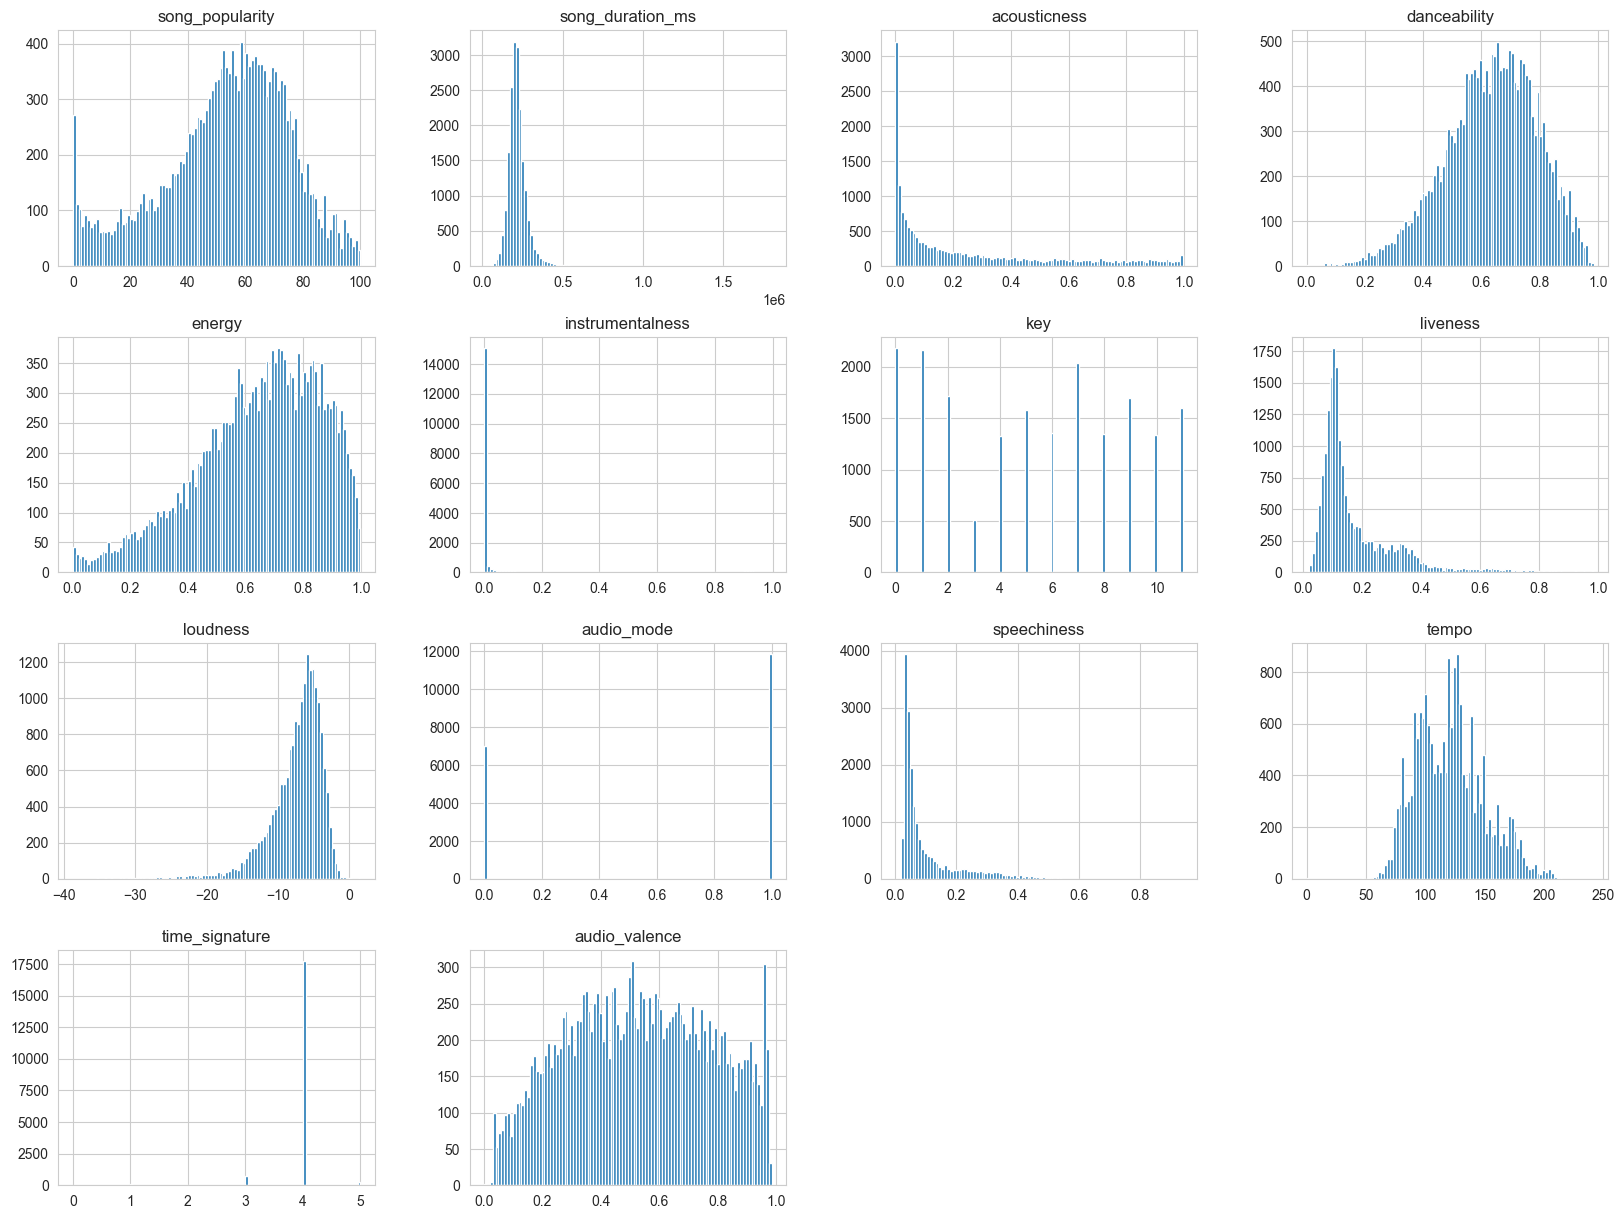

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
raw_data.hist(bins=100, figsize=(20,15))
plt.show()

Some attributes have different scales. While most attributes have a scale ranging from 0-1, this is not true for time, and song_duration_ms. We will apply standardization/feature scaling techniques on them.
As for the target, it is expressed in values from 1 to 100, so it is quite clear and done well for our regression task. There is an upper limit to the score and it is well defined.

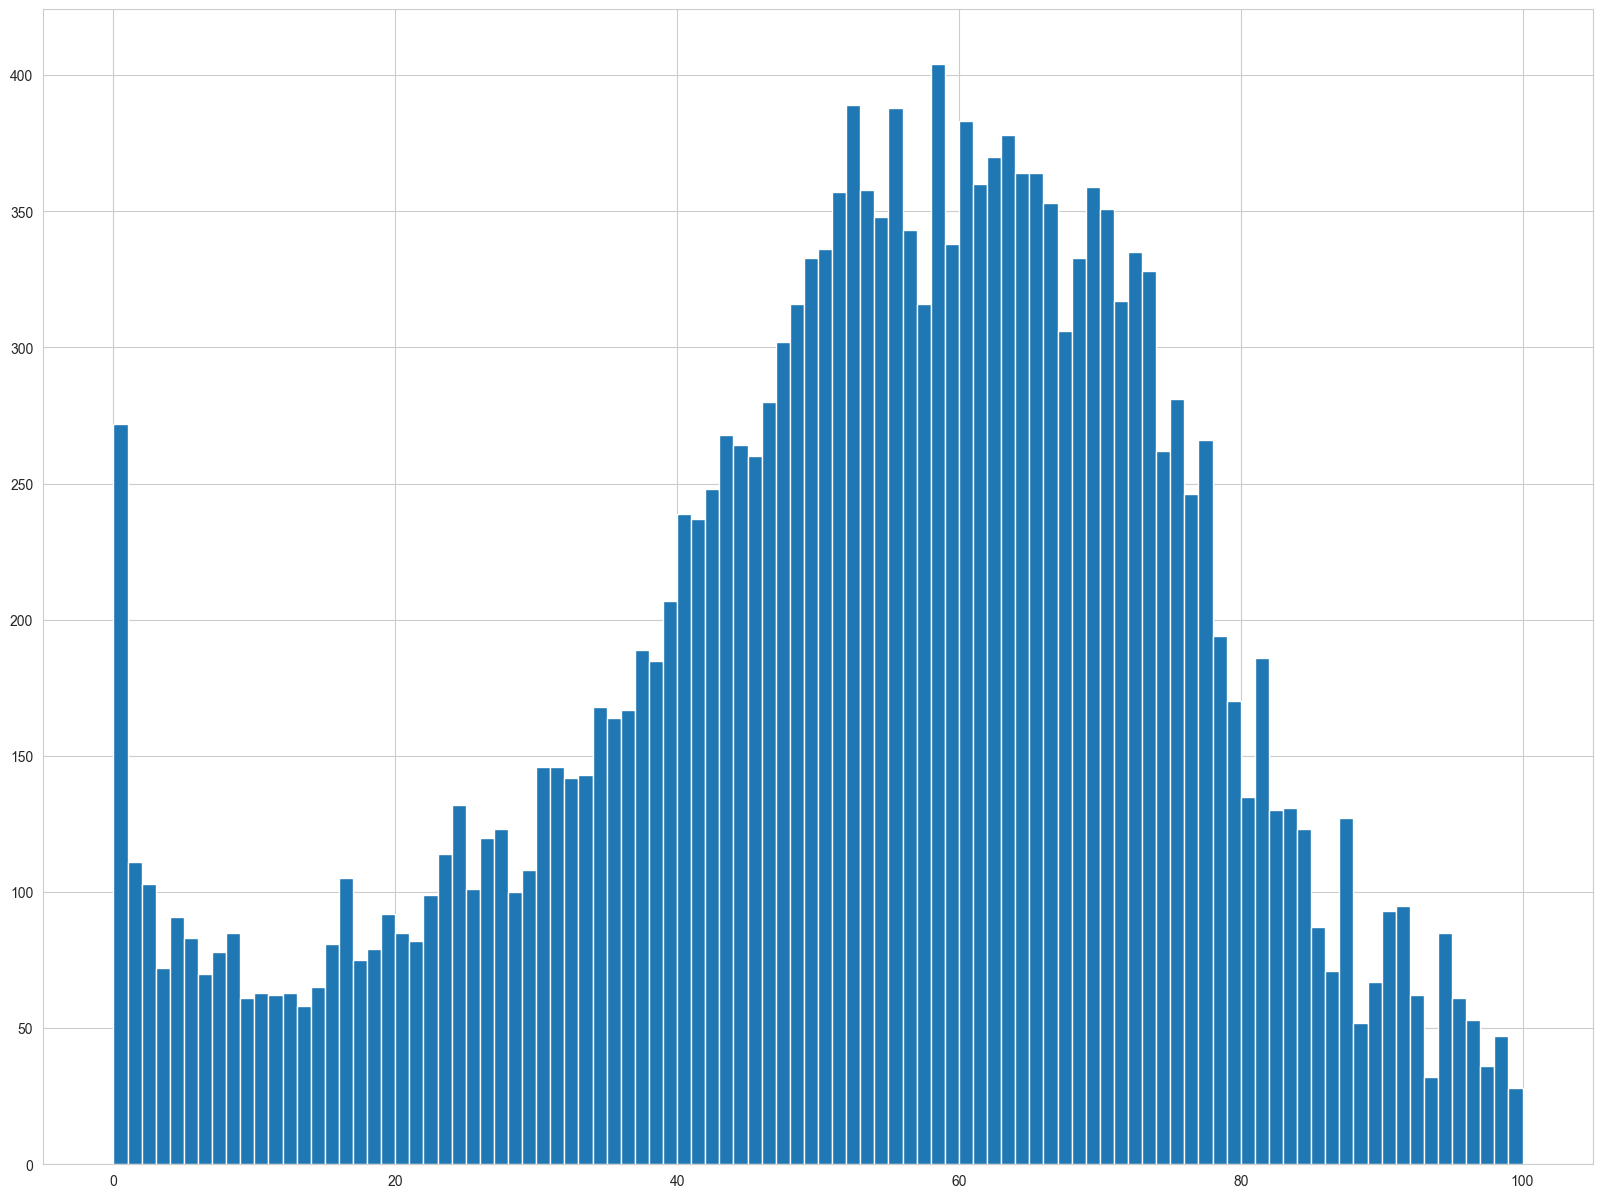

In [10]:
#Let us first analyze the distribution of the target variable
raw_data["song_popularity"].hist(bins=100, figsize=(20,15))
plt.show()

The Target Variable seems to be be normally distributed

In [12]:
song_data = raw_data.copy()
song_data.dropna(subset=['song_popularity'], inplace=True)

We remove any rows with null values in the song_popularity field 

In [13]:
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [14]:
song_data.drop(['song_name'], axis=1, inplace=True)

We remove the song_name column, as we do not need it.

In [15]:
song_data.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [16]:
corr_matrix = song_data.corr()
corr_matrix["song_popularity"].sort_values(ascending=False)

song_popularity     1.000000
danceability        0.104290
loudness            0.099442
time_signature      0.034983
speechiness         0.021479
energy              0.001365
audio_mode         -0.004969
key                -0.013160
song_duration_ms   -0.018899
tempo              -0.022672
liveness           -0.038937
audio_valence      -0.052895
acousticness       -0.065181
instrumentalness   -0.130907
Name: song_popularity, dtype: float64

We look for correlations of the various features with the target audience in order to identify those that are most relevant or not.

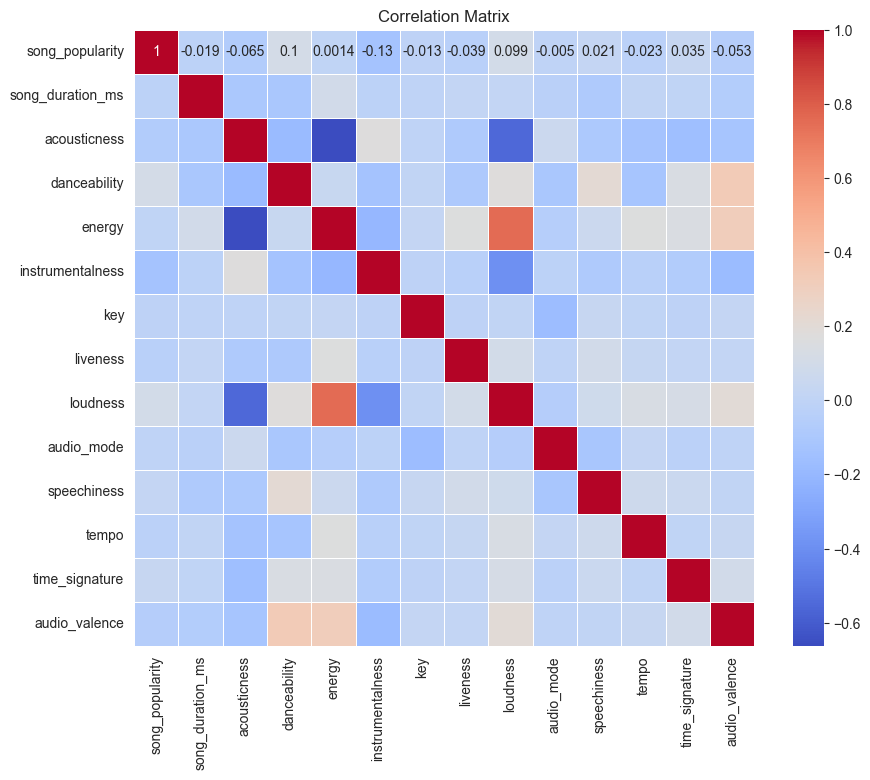

In [18]:
correlazioni = song_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlazioni, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

We look for correlations between attributes.
Energy and Loudness seem very related. So let's create a compound attribute.

In [20]:
song_data['energy_loudness'] = (song_data['energy'] + song_data['loudness']) / 2  # Media
song_data.drop(['energy'], axis=1, inplace=True)
song_data.drop(['loudness'], axis=1, inplace=True)

We created the compound attribute by combining the two data, making a simple average.

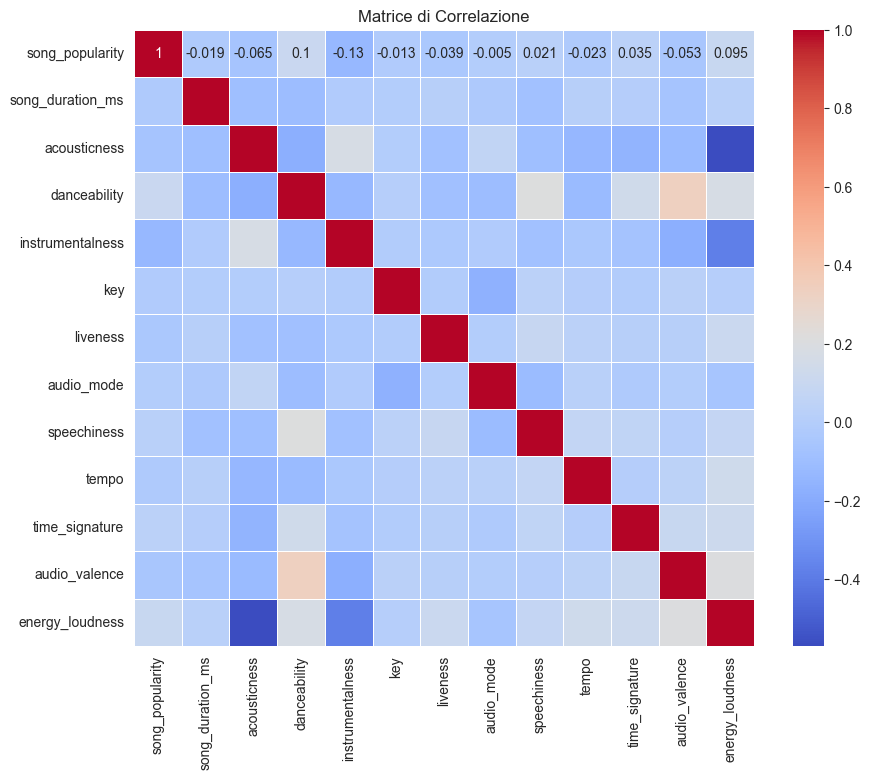

In [21]:
correlazioni = song_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlazioni, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matrice di Correlazione")
plt.show()

In [22]:
song_data.drop(['audio_mode'], axis=1, inplace=True)
corr_matrix = song_data.corr()
corr_matrix["song_popularity"].sort_values(ascending=False)

song_popularity     1.000000
danceability        0.104290
energy_loudness     0.095425
time_signature      0.034983
speechiness         0.021479
key                -0.013160
song_duration_ms   -0.018899
tempo              -0.022672
liveness           -0.038937
audio_valence      -0.052895
acousticness       -0.065181
instrumentalness   -0.130907
Name: song_popularity, dtype: float64

We also removed the audio_mode attribute, as it was not significant in terms of targeting.

In [23]:

# Crea gli intervalli per la categorizzazione
bins = [0, 10, 20, 30, 40, 50,60,70,80,90,100]

# Crea le etichette per i gruppi
labels = [1, 2, 3, 4, 5,6,7,8,9,10]

song_data["popularity_cat"] = pd.cut(song_data["song_popularity"], bins=bins, labels=labels, include_lowest=True)


In order to do stratified sampling, we created 10 data sets based on the target variable. In this way, we try to keep the same distributions in the dataset, obviously depending on the target.

In [25]:
song_data["popularity_cat"].value_counts()

popularity_cat
6     3624
7     3538
5     2844
8     2534
4     1750
3     1125
1     1089
9     1067
2      765
10     499
Name: count, dtype: int64

<Axes: >

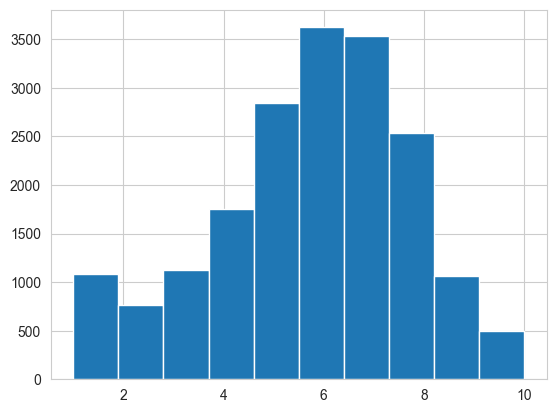

In [26]:
song_data["popularity_cat"].hist()

In [27]:
song_data.dropna(subset=['popularity_cat'], inplace=True)

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(song_data, song_data['popularity_cat']):
    strat_train_set = song_data.iloc[train_index]
    strat_test_set = song_data.iloc[test_index]

In [29]:
strat_test_set["popularity_cat"].value_counts() / len(strat_test_set)

popularity_cat
6     0.192461
7     0.187683
5     0.151049
8     0.134590
4     0.092912
3     0.059729
1     0.057871
9     0.056544
2     0.040616
10    0.026546
Name: count, dtype: float64

In [30]:
song_data["popularity_cat"].value_counts() / len(song_data)

popularity_cat
6     0.192408
7     0.187842
5     0.150995
8     0.134537
4     0.092912
3     0.059729
1     0.057818
9     0.056650
2     0.040616
10    0.026493
Name: count, dtype: float64

In [31]:
train_set = strat_train_set.copy()
train_set.drop(['popularity_cat'], axis=1, inplace=True)
test_set = strat_test_set.copy()
test_set.drop(['popularity_cat'], axis=1, inplace=True)

In [32]:
train_y = train_set["song_popularity"].copy()
train_x = train_set.drop("song_popularity", axis=1) # drop labels for training set
test_y = test_set["song_popularity"].copy()
test_x = test_set.drop("song_popularity", axis=1) # drop labels for training set


We create training and test sets

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

train_x = num_pipeline.fit_transform(train_x)
train_x = pd.DataFrame(train_x)

test_x = num_pipeline.transform(test_x)
test_x = pd.DataFrame(test_x)


We create a pipeline to standardize and for the imputer

In [34]:
train_x

,0,1,2,3,4,5,6,7,8,9,10
0,0.003042,-0.891081,-1.687084,-0.350693,-0.354406,0.978022,0.321585,1.981322,0.131836,-0.064722,0.877796
1,-0.186411,-0.891811,-0.005015,-0.331011,-0.078313,-0.723504,-0.677265,0.324772,0.131836,1.436521,-1.255483
2,-0.859477,-0.101976,0.944335,-0.350693,1.302152,0.160514,-0.365364,-0.198151,0.131836,0.786118,-1.555487
3,-0.234763,-0.580054,-0.865164,-0.310194,-0.354406,2.543759,-0.346229,1.775442,0.131836,0.479325,0.048062
4,-0.593380,-0.378722,1.511396,-0.350693,1.302152,-0.852366,-0.218981,-1.010448,0.131836,0.377060,-0.245393
...,...,...,...,...,...,...,...,...,...,...,...
15063,-0.877263,0.472270,-0.833306,-0.348553,-1.458779,0.292146,-0.446688,0.288461,0.131836,0.184803,0.538245
15064,0.361396,0.648696,1.320252,-0.350668,-1.182686,0.603908,1.278337,-0.868932,0.131836,1.366981,1.070746
15065,-0.600165,-0.855070,1.001678,-0.350693,1.578246,1.178936,1.756714,1.463452,0.131836,-0.367425,0.012545
15066,1.812596,0.406543,-0.674020,-0.350693,-0.906592,-0.483794,-0.732757,-1.111820,0.131836,-0.277432,-1.006361


In [35]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)

training_predictions = lin_reg.predict(train_x)
lin_mse = mean_squared_error(train_y, training_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

21.439007065952005

We train a linear regression model and see the error on the training set.

In [37]:
some_data = test_x.iloc[:5]
some_labels = test_y.iloc[:5]

print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [48.79764256 55.99405487 53.99260153 51.87849639 55.05764683]
Labels: [66, 89, 43, 32, 94]


Let's look at the accuracy on 5 random samples

In [38]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_x, train_y)

training_predictions = tree_reg.predict(train_x)
lin_mse = mean_squared_error(train_y, training_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.5171877569788452

We train a Decision Tree Regressor and see the error on the training set. The error is very low. It may be a sign of overfitting.

In [39]:
print("Predictions:", tree_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [40. 89. 56. 52. 94.]
Labels: [66, 89, 43, 32, 94]


In fact, the results on random data do not seem to be as promising as those on the training set.

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=30, random_state=42)
forest_reg.fit(train_x, train_y)

training_predictions = forest_reg.predict(train_x)
lin_mse = mean_squared_error(train_y, training_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


7.023018391699887

We train a random forest regressor, and seeing the error committed on the training set, the results look very interesting.

In [42]:
print("Predictions:", forest_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [48.06666667 89.         50.53333333 49.93333333 89.        ]
Labels: [66, 89, 43, 32, 94]


In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly_features.fit_transform(train_x)

lin_poly_reg = LinearRegression()
lin_poly_reg.fit(X_train_poly, train_y)

training_predictions = lin_poly_reg.predict(X_train_poly)
lin_mse = mean_squared_error(train_y, training_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

21.017688845718684

Let's try a polynomial regressor

In [44]:
some_data_poly = poly_features.transform(some_data)

print("Predictions:", lin_poly_reg.predict(some_data_poly))
print("Labels:", list(some_labels))

Predictions: [49.3813432  57.88873868 54.11339918 51.16599488 57.81756061]
Labels: [66, 89, 43, 32, 94]


In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, train_x, train_y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [21.91821902 21.65273376 21.09047418 21.57386134 21.44854916 20.67043497
 21.47208082 21.65356925 21.38783281 21.66999838]
Mean: 21.45377536737353
Standard deviation: 0.33267156957794775


In [46]:
scores = cross_val_score(tree_reg, train_x, train_y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [25.13870694 24.65164206 24.02333099 24.02435119 23.79726429 23.8014086
 24.25042018 25.06798068 23.88487652 24.29718214]
Mean: 24.29371635906941
Standard deviation: 0.47382899267652195


In [47]:
scores = cross_val_score(forest_reg, train_x, train_y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [18.08505123 17.00387118 17.85375852 17.53167401 17.42819004 16.7094778
 17.53038937 17.8826272  17.28668028 17.90474172]
Mean: 17.52164613351786
Standard deviation: 0.41190069084396413


In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = [
        {'n_estimators': [3, 20, 30,50,80,100], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)
grid_search.fit(train_x, train_y)
grid_search.best_params_

{'max_features': 4, 'n_estimators': 80}

Since the best model seems to be The Random Forest Regressor, we use a GridSearch approach so as to identify the best parameters to set for the model.

In [52]:
grid_search.best_estimator_


RandomForestRegressor(max_features=4, n_estimators=80)

In [53]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

20.44977559411414 {'max_features': 2, 'n_estimators': 3}
18.371241587912177 {'max_features': 2, 'n_estimators': 10}
17.663486625199347 {'max_features': 2, 'n_estimators': 30}
17.52271522359603 {'max_features': 2, 'n_estimators': 50}
17.480946353735533 {'max_features': 2, 'n_estimators': 80}
17.446103520540447 {'max_features': 2, 'n_estimators': 100}
20.43055810292944 {'max_features': 4, 'n_estimators': 3}
18.219865579896815 {'max_features': 4, 'n_estimators': 10}
17.699803040793583 {'max_features': 4, 'n_estimators': 30}
17.538204062457627 {'max_features': 4, 'n_estimators': 50}
17.424559532351473 {'max_features': 4, 'n_estimators': 80}
17.466646728360978 {'max_features': 4, 'n_estimators': 100}
20.513476053214504 {'max_features': 6, 'n_estimators': 3}
18.43463647870824 {'max_features': 6, 'n_estimators': 10}
17.703055818232436 {'max_features': 6, 'n_estimators': 30}
17.55111070986285 {'max_features': 6, 'n_estimators': 50}
17.548589132936304 {'max_features': 6, 'n_estimators': 80}
17.

In [51]:
final_model = grid_search.best_estimator_
X_test_prepared = test_x
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(test_y, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

17.05968247069765

Evaluating the results on the test set, we can see that they are the best obtained, although one could try to do better with a more complex model capable of identifying patterns in the data and figuring out how to predict targets more accurately

In [62]:
from tensorflow import keras
from tensorflow.keras import layers

num_features=11
# Crea il modello
model = keras.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='linear')  # Output lineare per regressione
])
# Compila il modello
model.compile(optimizer='adam', loss='mean_squared_error')

# Addestra il modello
model.fit(train_x, train_y, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
377/377 [==============================] - 1s 837us/step - loss: 913.7515 - val_loss: 521.5192
Epoch 2/50
377/377 [==============================] - 0s 672us/step - loss: 488.6852 - val_loss: 492.0811
Epoch 3/50
377/377 [==============================] - 0s 666us/step - loss: 471.5852 - val_loss: 475.6117
Epoch 4/50
377/377 [==============================] - 0s 658us/step - loss: 462.2768 - val_loss: 474.7909
Epoch 5/50
377/377 [==============================] - 0s 666us/step - loss: 455.5128 - val_loss: 467.5503
Epoch 6/50
377/377 [==============================] - 0s 658us/step - loss: 453.4263 - val_loss: 459.7288
Epoch 7/50
377/377 [==============================] - 0s 661us/step - loss: 449.6429 - val_loss: 455.9729
Epoch 8/50
377/377 [==============================] - 0s 654us/step - loss: 447.1645 - val_loss: 456.4251
Epoch 9/50
377/377 [==============================] - 0s 675us/step - loss: 445.3691 - val_loss: 452.2436
Epoch 10/50
377/377 [=========================

In [63]:
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(test_y, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

118/118 [==============================] - 0s 378us/step


20.84512045237642